/tmp/ipykernel_45795/3756861729.py:64: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for l_handle in ax.legend_.legendHandles:
/tmp/ipykernel_45795/3756861729.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_45795/3756861729.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for l_handle in ax.legend_.legendHandles:
/tmp/ipykernel_45795/3756861729.py:82: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


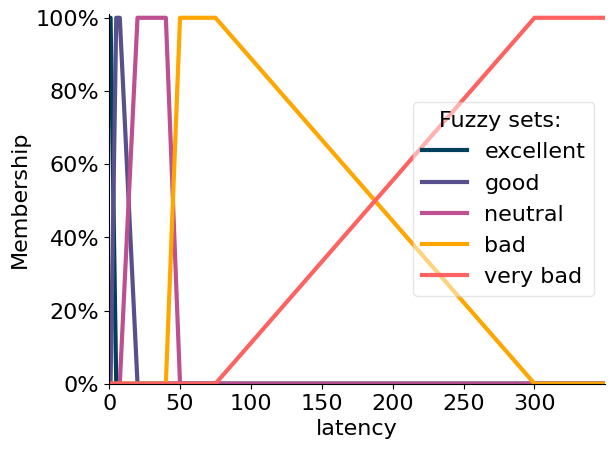

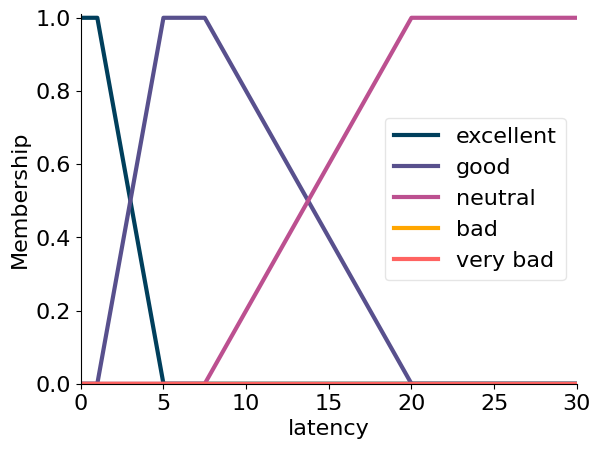

0.9100000000000001


/tmp/ipykernel_45795/3756861729.py:121: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for l_handle in ax.legend_.legendHandles:


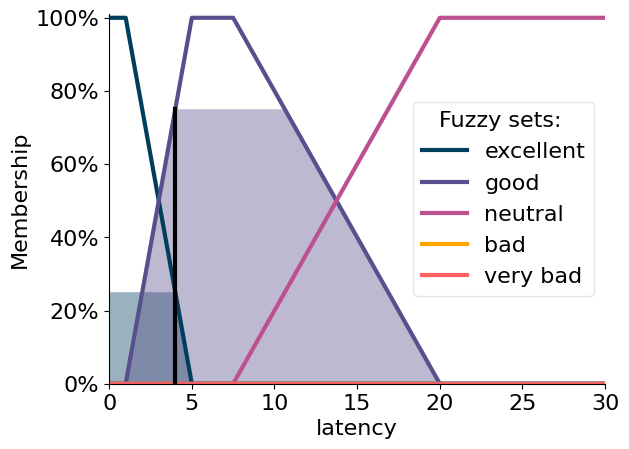

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib import rcParams
import matplotlib.ticker as mtick


import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy.control.visualization import FuzzyVariableVisualizer
# linewidth
l = 5

# color palette 
custom_palette = ['#003f5c', '#58508d', '#bc5090', '#ffa600', '#ff6361'] 
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=custom_palette)

## Antecedents 
u_latency = np.arange(0, 350, 0.1)
latency = ctrl.Antecedent(u_latency, 'latency')

u_loss = np.arange(0, 100000, 1)
loss = ctrl.Antecedent(u_loss, 'loss')

u_bandwith = np.arange(0, 1000, 1)
bandwith = ctrl.Antecedent(u_bandwith, 'bandwith')

## Consequent 
trust = ctrl.Consequent(np.arange(0.0, 1.0, 0.01), 'trust')

## Antecedents membership functions 
latency["excellent"]= fuzz.trapmf(u_latency, [0.0, 0, 1, 5.0])
latency["good"]= fuzz.trapmf(u_latency, [1.0, 5.0, 7.5, 20.0])
latency["neutral"]= fuzz.trapmf(u_latency, [7.5, 20, 40, 50])
latency["bad"]= fuzz.trapmf(u_latency, [40, 50, 75, 300])
latency["very bad"]= fuzz.trapmf(u_latency, [75, 300,350,350])

bandwith["very bad"] = fuzz.trapmf(u_bandwith, [1, 1,1,10])
bandwith["bad"] = fuzz.trapmf(u_bandwith, [1, 10, 50, 100])
bandwith["neutral"] = fuzz.trapmf(u_bandwith, [50, 100, 100, 300])
bandwith["good"] = fuzz.trapmf(u_bandwith, [100, 300, 500, 750])
bandwith["excellent"] = fuzz.trapmf(u_bandwith, [500, 750, 1000, 1000])

loss["excellent"] = fuzz.trapmf(u_loss,[10000,50000,100000,100000])
loss["good"] = fuzz.trapmf(u_loss, [1000,5000,10000,50000])
loss["neutral"] = fuzz.trapmf(u_loss, [500,1000,1000,5000])
loss["bad"] = fuzz.trapmf(u_loss, [10,100,500 ,1000 ])
loss["very bad"] = fuzz.trapmf(u_loss, [0,0 ,10,100])

## Consequent membership functions 
trust["excellent"] = fuzz.trimf(trust.universe, [0.75,1.0,1.0])
trust["good"] = fuzz.trimf(trust.universe, [0.5,0.75,1.0])
trust["neutral"] = fuzz.trimf(trust.universe, [0.25,0.5,0.75])
trust["bad"] =  fuzz.trimf(trust.universe, [0.0,0.25,0.5])
trust["very bad"] = fuzz.trimf(trust.universe, [0.0,0.0,0.25])

rcParams.update({"font.size": 16})

# Accessing directly FuzzyVariableVisualizer from skfuzzy allow further graph customization
fig, ax = FuzzyVariableVisualizer(latency).view()
for line in ax.lines:
    line.set_linewidth(3)
for l_handle in ax.legend_.legendHandles: 
    l_handle.set_linewidth(3)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
ax.legend_._set_loc(5)
ax.legend_.set_title("Fuzzy sets: ")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
fig.savefig('../plotter/fuzzy/latency.pdf')

fig.show()

fig, ax = FuzzyVariableVisualizer(latency).view()
for line in ax.lines:
    line.set_linewidth(3)
for l_handle in ax.legend_.legendHandles: 
    l_handle.set_linewidth(3)
ax.set_xlim([0, 30])
fig.savefig('../plotter/fuzzy/latency_zoomed.pdf')

fig.show()


plt.show()
# bandwith.view()
# loss.view()



x_latency_zoomed = np.arange(0, 50, 0.1)
x_bandwith_zoomed = np.arange(0, 50, 0.1)
x_loss_zoomed = np.arange(0, 50, 0.1)

eMBB1 = ctrl.Rule(latency['excellent'] | latency['good'] | bandwith['excellent']|bandwith['good'], trust['excellent'])
eMBB2 = ctrl.Rule(latency['neutral'] | bandwith['neutral'], trust['neutral'])
eMBB3 = ctrl.Rule(bandwith['bad'] |bandwith['very bad'], trust['bad'])
eMBB4 = ctrl.Rule((latency['bad']|latency['very bad'])&(bandwith['bad'] |bandwith['very bad']), trust['very bad'])
eMBB5 = ctrl.Rule(latency['bad']|latency['very bad'], trust['bad'])


eMBB_trust_ctrl = ctrl.ControlSystem([eMBB1, eMBB2, eMBB3, eMBB4])
t = ctrl.ControlSystemSimulation(eMBB_trust_ctrl)

t.input['latency'] = 4
t.input['bandwith'] = 400
# trust.input['loss'] = 100

# Crunch the numbers
t.compute()
fuzz.interp_membership
print(t.output['trust'])

fig, ax = FuzzyVariableVisualizer(latency).view(sim=t)
for line in ax.lines:
    line.set_linewidth(3)
ax.set_xlim([0, 30])
ax.legend_.set_title("Fuzzy sets: ")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for l_handle in ax.legend_.legendHandles: 
    l_handle.set_linewidth(3)

# fig.savefig('../plotter/fuzzy/latency_fuzzy_set_zoomed.pdf')
# trust.view()

# trust.view(sim=t)


